# 01 – Data Preprocessing
### Student Depression Prediction: Preparing Data for XGBoost Model

---

## 📌 Objective
Prepare and clean the student depression dataset for machine learning analysis using XGBoost classification.

**Key Tasks:**
- Load and explore raw data
- Handle missing values and outliers
- Encode categorical variables
- Scale numerical features
- Export clean dataset for modeling

---

### 📂 Input  
 - `student_depression_dataset.csv` saved in `Data/raw/`  


### 📦 Output  
- `clean_data.csv` saved in `Data/processed/FC110552_mithula-cbw/`

---

### 📊 Dataset Overview

| **Attribute** | **Details** |
|---------------|-------------|
| **Dataset Size** | 27,901 records × 18 features |
| **Data Type** | Structured tabular data (CSV format) |
| **Target Variable** | `Depression_Status` (Binary: 0/1 or Yes/No) |
| **Problem Type** | Binary Classification |
| **Data Source** | [Student Depression Dataset](www.kaggle.com/datasets/adilshamim8/student-depression-dataset) |

### 📈 Expected Outcomes
- Clean, processed dataset ready for machine learning

In [274]:
# =====================================
# STEP 1: DATA LOADING & EXPLORATION
# =====================================


# Load libraries and suppress warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prettytable import PrettyTable
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [275]:

# Load the dataset

raw_df = pd.read_csv("./Data/raw/student_depression_dataset.csv")

In [276]:
# Reusable function definitions

# Function to Print Shape of DataFrame
def get_data_shape(data: pd.DataFrame) -> None:
    if data.empty:
        print("DataFrame is empty.")
    else:
        # Print the shape of the DataFrame
        print("DataFrame Dimensions")
        print("------------------------")
        print(f"Rows   : {data.shape[0]}")
        print(f"Columns: {data.shape[1]}\n")

# Function to prints the first `n` rows of the given DataFrame.
def print_head(data: pd.DataFrame, n: int = 5) -> None:
    print(f"\nFirst {n} rows:")
    display(data.head(n))

# A function to format value counts into a table. For more elegant and readable notebook.
def value_counts_pretty(series, column_name="Value", n=None, head=True):
    value_counts = series.value_counts(dropna=False)
    percentages = series.value_counts(dropna=False, normalize=True) * 100
    
    # Apply head/tail filtering if n is specified
    if n is not None:
        if head:
            value_counts = value_counts.head(n)
            percentages = percentages.head(n)
        else:
            value_counts = value_counts.tail(n)
            percentages = percentages.tail(n)
    
    table = PrettyTable()        
    table.field_names = [column_name, "Count", "Percentage"]
    
    # Set alignment
    table.align[column_name] = "c"
    table.align["Count"] = "r"
    table.align["Percentage"] = "r"
    
    # Add rows
    for rank, (value, count) in enumerate(value_counts.items(), 1):
        display_value = "NaN/Missing" if pd.isna(value) else str(value)
        pct = percentages[value]
        
        table.add_row([display_value, count, f"{pct:.2f}%"])
    
    return table

In [277]:
# Find the dimensions of the dataset
get_data_shape(raw_df)

DataFrame Dimensions
------------------------
Rows   : 27901
Columns: 18



In [278]:
# Check data structure and datatypes of each column
table = PrettyTable()
table.field_names = ["Column", "Non-Null Count", "Dtype"]

for col in raw_df.columns:
    non_null_count = raw_df[col].count()
    dtype = raw_df[col].dtype
    table.add_row([col, non_null_count, dtype])

print("\n🔹 Dataset Summary:")
print(table)


🔹 Dataset Summary:
+---------------------------------------+----------------+---------+
|                 Column                | Non-Null Count |  Dtype  |
+---------------------------------------+----------------+---------+
|                   id                  |     27901      |  int64  |
|                 Gender                |     27901      |  object |
|                  Age                  |     27901      | float64 |
|                  City                 |     27901      |  object |
|               Profession              |     27901      |  object |
|           Academic Pressure           |     27901      | float64 |
|             Work Pressure             |     27901      | float64 |
|                  CGPA                 |     27901      | float64 |
|           Study Satisfaction          |     27901      | float64 |
|            Job Satisfaction           |     27901      | float64 |
|             Sleep Duration            |     27901      |  object |
|             

In [279]:
# Display first few rows (Provides a quick look at the dataset's content).
print_head(raw_df)


First 5 rows:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


💡 **Observations:**  
- All columns seems to be having `27901` Non-Null counts suggesting no missing values.
- All column names are readable and appear to be semantically meaningful.
- The `id` column does not increment sequentially
- `Work Pressure` and `Job Satisfaction` have only 0.0 values in the initial rows.
- The `Profession` column appears to contain only "Student" values so far.

> *🧠 Some column names contain spaces, which can cause issues in processing, let's fix them up.*

In [280]:
# Clean column names
# Remove leading/trailing spaces, convert to lowercase, replace spaces and question marks
df = raw_df.copy()  # Added missing parentheses
df.columns = [col.strip().lower().replace(" ", "_").replace("/", "_").replace("?", "").rstrip("_") for col in raw_df.columns]
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['id', 'gender', 'age', 'city', 'profession', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts', 'work_study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']


In [281]:
# Prints basic statistics (mean, standard deviation, min, max, etc.)
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('id', errors='ignore')  # For  numeric data types
display(df[numeric_cols].describe())   

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work_study_hours,depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


💡 **Observations:**  
- `Age` mostly ranges between 21 to 30, aligning with student demographics ,though the max age is 59, which may be an outlier or non-student entry.
- `Work Pressure` and `Job Satisfaction` values appear to be very close to 0, suggesting missing data, poor scaling, or inactive features. 

> *🧠 First, let's examine the behavior of `Work Pressure` and `Job Satisfaction` to understand their distribution better*


In [282]:
# Analyze Selected Columns: `Work Pressure` and `Job Satisfaction`
colsJob = ['work_pressure', 'job_satisfaction']
for col in colsJob:
    print(f"\n🔍 Value counts for '{col}':")
    print(value_counts_pretty(df[col], col , n=3))


🔍 Value counts for 'work_pressure':
+---------------+-------+------------+
| work_pressure | Count | Percentage |
+---------------+-------+------------+
|      0.0      | 27898 |     99.99% |
|      5.0      |     2 |      0.01% |
|      2.0      |     1 |      0.00% |
+---------------+-------+------------+

🔍 Value counts for 'job_satisfaction':
+------------------+-------+------------+
| job_satisfaction | Count | Percentage |
+------------------+-------+------------+
|       0.0        | 27893 |     99.97% |
|       2.0        |     3 |      0.01% |
|       4.0        |     2 |      0.01% |
+------------------+-------+------------+


💡 **Observations:**  
- Work Pressure: 99.99% of the values are 0.0
- Job Satisfaction: Also dominated by 0.0 values 99.97%.

> *🧠 Work Pressure and Job Satisfaction show extreme class imbalance (>99% zero). These features likely carry no predictive value and may be excluded from training.*



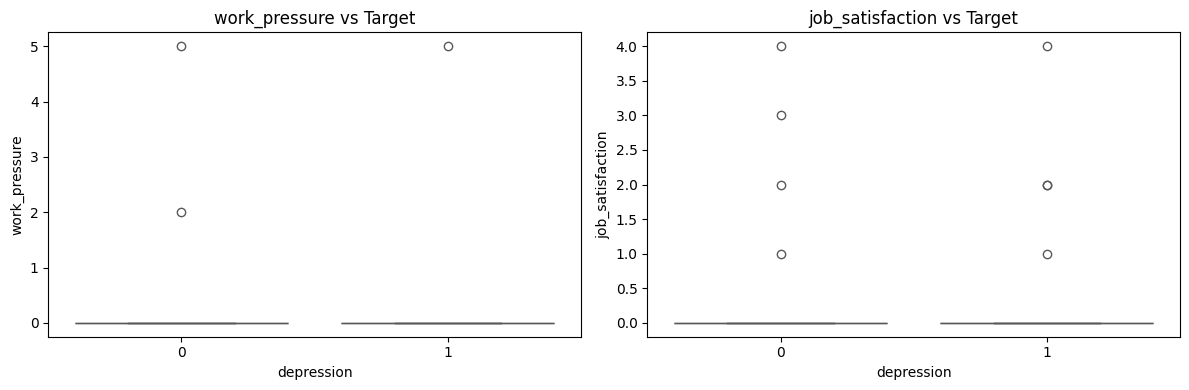

In [283]:
# Visualize distributions of selected job-related columns
plt.figure(figsize=(12, 4))

for i, col in enumerate(colsJob, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='depression', y=col, palette='Set2')
    plt.title(f'{col} vs Target')
    plt.xlabel('depression')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


💡 **Observations:**  
- The few non-zero values are rare outliers, and they're randomly scattered, not concentrated in any one class.

> *🧠 This pattern strongly suggests these features offer no meaningful separation between the target classes.*


> 🔻 So we drop `Work Pressure` and `Job Satisfaction` : highly skewed, not predictive.

In [284]:
# 📌 Drop the columns in place
df.drop(['work_pressure', 'job_satisfaction'], axis=1, inplace=True)

In [285]:
# A quick look at the data frame after the changes
print_head(df)


First 5 rows:


,id,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


> *🧠 Next we can focus on the `Profession` column.*

In [286]:

# Analyze Profession value counts.
print(f"\n# Value counts for 'Profession':")
print(df['profession'].value_counts(dropna=False))


# Value counts for 'Profession':
profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64


In [287]:
# Summary of value counts for better readability
print(f"\n# Summery of value counts 'Profession':")

student_count = df[df['profession'] == 'Student'].shape[0]
print(f"Student count: {student_count}")

non_student_count = df.shape[0] - student_count
print(f"Other count: {non_student_count} ({(non_student_count/df.shape[0])*100:.2f}%)")


# Summery of value counts 'Profession':
Student count: 27870
Other count: 31 (0.11%)


💡 **Observations:**  
- The column `Profession` is heavily imbalanced, with "Student" making up 99.89% of the data.
- The remaining values represent non-student professions and occur in very small numbers. 

> *🧠 Since our project focuses on students, and the presence of other professions is minimal and irrelevant, these entries can be safely excluded.*

> 🔻 So we drop `Profession` : not needed after filtering to only student data.

In [288]:
# 📌 Drop the column in place
df.drop(['profession'], axis=1, inplace=True)

In [289]:
# A quick look at the data frame after the changes
print_head(df)


First 5 rows:


,id,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [290]:
# new dimensions of the dataset
get_data_shape(df)

DataFrame Dimensions
------------------------
Rows   : 27901
Columns: 15



> *🧠 Next we can focus on the `City` column.*
- Since our project focuses on **student depression**, and the dataset is sourced from **India**, we need to evaluate whether `City` contributes meaningful information or if it introduces noise due to geographic mismatch or imbalance.

In [291]:
# Check Basic Distribution of 'City' Column

# Count of unique cities
print(f"Unique cities: {df['city'].nunique()}")

# Top 5 most frequent cities
print("\n🔍Top 5 Most Frequent Cities:")
print(value_counts_pretty(df['city'], "City", n=5))

# Top 5 least frequent cities
print("\n🔍Top 5 Least Frequent Cities:")
print(value_counts_pretty(df['city'], "City", n=5, head=False))


Unique cities: 52

🔍Top 5 Most Frequent Cities:
+-------------+-------+------------+
|     City    | Count | Percentage |
+-------------+-------+------------+
|    Kalyan   |  1570 |      5.63% |
|   Srinagar  |  1372 |      4.92% |
|  Hyderabad  |  1340 |      4.80% |
| Vasai-Virar |  1290 |      4.62% |
|   Lucknow   |  1155 |      4.14% |
+-------------+-------+------------+

🔍Top 5 Least Frequent Cities:
+-----------+-------+------------+
|    City   | Count | Percentage |
+-----------+-------+------------+
|   Nalyan  |     1 |      0.00% |
|   Mihir   |     1 |      0.00% |
|   Nalini  |     1 |      0.00% |
|  Nandini  |     1 |      0.00% |
| Khaziabad |     1 |      0.00% |
+-----------+-------+------------+


💡 **Observations:**  
- The top 5 cities each have ~1000 or more entries.
- The bottom 5 cities have only 1 record each, suggesting they're rare or outliers.

> *🧠 Let's visualize the city distribution for a clearer understanding of its skewness.*

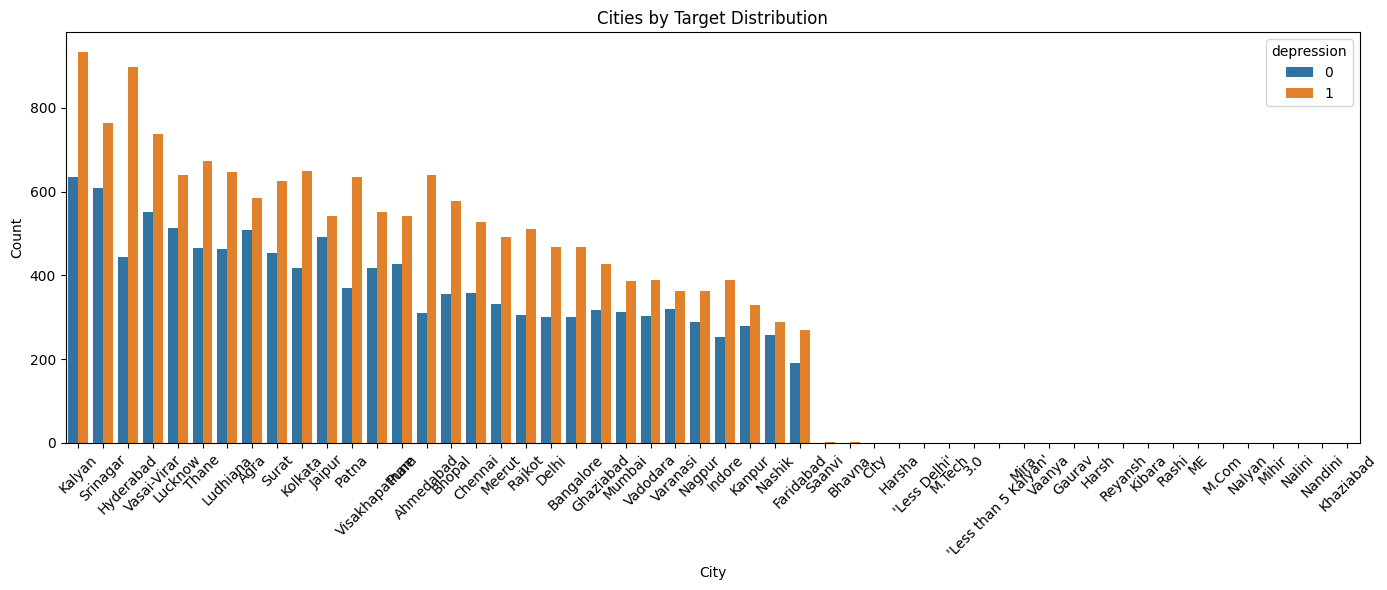

In [292]:
# Data visualization for `City` column

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='city', hue='depression', order=df['city'].value_counts().index[:])
plt.title("Cities by Target Distribution")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

💡 **Observations:**  
- `City` column shows a long-tail distribution with top cities highly represented
- There are clear data quality issues, as some entries in the City column are invalid or noisy, `e.g., 'Less than 5', 'M.Tech', 'M.Com', Nayra, Mini, etc.`  

.
> *🔻 City column will be dropped because:*
- The dataset contains Indian cities, not relevant and may introduce regional bias.
- The column has significant skewness, with a few cities dominating the data
- There are clear data quality issues.

In [293]:
# 📌 Drop the column in place
df.drop(['city'], axis=1, inplace=True)

In [294]:
# Overview of the dataset after column drops
# new dimensions of the dataset
get_data_shape(df)
# Let's take a look at remaining columns

print("\nColumn names:")
print(df.columns.tolist())

# Print first five rows 
print(f"\nFirst five rows of edited dataset:")
df.head()

DataFrame Dimensions
------------------------
Rows   : 27901
Columns: 14


Column names:
['id', 'gender', 'age', 'academic_pressure', 'cgpa', 'study_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts', 'work_study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']

First five rows of edited dataset:


,id,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,work_study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [295]:
# Statistical Summary of the dataset after column drops
# Statistical Summary for Numerical Columns (excluding 'id' if needed)
print("Statistical Summary for Numerical Columns:")
print(df.describe())

# Statistical Summary for Categorical Column
print("\nStatistical Summary for Categorical Columns:")
cat_describe = df.describe(include=['object']).transpose()

table = PrettyTable()
table.field_names = ['Column', 'Count', 'Unique', 'Top', 'Freq']

for col_name, row in cat_describe.iterrows():
    table.add_row([
        col_name,
        row['count'],
        row['unique'],
        row['top'],
        row['freq']
    ])

print(table)

Statistical Summary for Numerical Columns:
                  id           age  academic_pressure          cgpa  study_satisfaction  work_study_hours    depression
count   27901.000000  27901.000000       27901.000000  27901.000000        27901.000000      27901.000000  27901.000000
mean    70442.149421     25.822300           3.141214      7.656104            2.943837          7.156984      0.585499
std     40641.175216      4.905687           1.381465      1.470707            1.361148          3.707642      0.492645
min         2.000000     18.000000           0.000000      0.000000            0.000000          0.000000      0.000000
25%     35039.000000     21.000000           2.000000      6.290000            2.000000          4.000000      0.000000
50%     70684.000000     25.000000           3.000000      7.770000            3.000000          8.000000      1.000000
75%    105818.000000     30.000000           4.000000      8.920000            4.000000         10.000000      1.0000

💡 **Observations:**  
- All the remaining columns appear to be relevant to the analysis.
- Most categorical features seem to be already encoded as numerical ranges.

> *🧠 Some categorical columns (e.g., sleep time) may require custom handling*

## Next Step: Column Data Type Casting

In [296]:
# Defines a list of columns that should be treated as categorical.
cat_cols = ['gender', 'degree', 'sleep_duration',
            'have_you_ever_had_suicidal_thoughts',
            'family_history_of_mental_illness']

# Converts the columns defined above to 'category' data type.
for col in cat_cols:
    df[col] = df[col].astype('category')

> *🧠 Let's understand the content of the following columns to determining cleaning strategies.*

In [297]:
# Prints the unique values in the categorical columns.
print(f"\n🔍 Count of values in 'sleep_duration':", df['sleep_duration'].dtype)
print(value_counts_pretty(df['sleep_duration']))
print(f"\n🔍 Count of values in 'financial_stress':", df['financial_stress'].dtype)
print(value_counts_pretty(df['financial_stress']))



🔍 Count of values in 'sleep_duration': category
+---------------------+-------+------------+
|        Value        | Count | Percentage |
+---------------------+-------+------------+
| 'Less than 5 hours' |  8310 |     29.78% |
|     '7-8 hours'     |  7346 |     26.33% |
|     '5-6 hours'     |  6183 |     22.16% |
| 'More than 8 hours' |  6044 |     21.66% |
|        Others       |    18 |      0.06% |
+---------------------+-------+------------+

🔍 Count of values in 'financial_stress': object
+-------+-------+------------+
| Value | Count | Percentage |
+-------+-------+------------+
|  5.0  |  6715 |     24.07% |
|  4.0  |  5775 |     20.70% |
|  3.0  |  5226 |     18.73% |
|  1.0  |  5121 |     18.35% |
|  2.0  |  5061 |     18.14% |
|   ?   |     3 |      0.01% |
+-------+-------+------------+


### 💡 Observations

- Sleep Duration:
  Contains values that have surrounding single quotes (e.g., `'5-6 hours'`).
  The `'Others'` category can be missing data and may require removal.

- Financial Stress:
  Mostly ordinal ordinal numeric values (1.0 to 5.0).  
  Contains a few invalid entries (`'?'`) that should be treated as missing data and handled accordingly.


In [298]:
# Replace 'Others' with NaN in Sleep Duration
df['sleep_duration'] = df['sleep_duration'].replace('Others', np.nan)

# Replace '?' with NaN in Financial Stress
df['financial_stress'] = df['financial_stress'].replace('?', np.nan)
# Convert Financial Stress to numeric
df['financial_stress'] = pd.to_numeric(df['financial_stress'], errors='coerce')
print(f"Financial Stress datatype: ", df['financial_stress'].dtype)

Financial Stress datatype:  float64


## Next Step: Data Cleaning

In [299]:
# ============================
# STEP 2: DATA CLEANING 
# ============================

# 2.1 - Duplicates analysis
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


💡 **Observations:**  
- No duplicates found at first glance.

> *🧠 Let’s remove the unique id and check again*  
> *🔻 `id` column will be dropped because:*
> - The `id` column has no predictive value.  
> - Hidden duplicates might exist except for the unique `id`.

In [300]:
# 📌 Drop the `id` column in place
df.drop(['id'], axis=1, inplace=True)

# Check for duplicates again after dropped `id`
print(f"\nDuplicate rows: {df.duplicated().sum()}")



Duplicate rows: 0


💡 **Observations:**  
- No duplicates found.

In [301]:
# 2.2 - Missing values analysis
df.isnull().sum()


gender                                  0
age                                     0
academic_pressure                       0
cgpa                                    0
study_satisfaction                      0
sleep_duration                         18
dietary_habits                          0
degree                                  0
have_you_ever_had_suicidal_thoughts     0
work_study_hours                        0
financial_stress                        3
family_history_of_mental_illness        0
depression                              0
dtype: int64

💡 **Observations:**  
- The current dataset appears to be complete, all columns have zero missing entries.

> *🧠  We can proceed directly to the next stages of cleaning*

## Next Step: Exploratory Data Analysis (EDA)

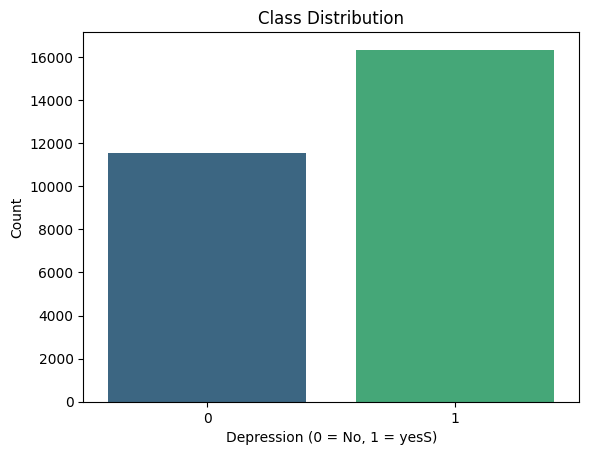

ℹ️ Target variable 'depression' distribution:


Value,Count,Percentage
1,16336,58.55%
0,11565,41.45%


In [302]:
# ===============================================
# STEP 3: Exploratory Data Analysis (EDA)
# ===============================================

# Check the distribution of the target variable to identify any class imbalance
sns.countplot(data=df, x='depression', palette="viridis")  
plt.title("Class Distribution")
plt.xlabel("Depression (0 = No, 1 = yesS)")
plt.ylabel("Count")
plt.show()

print("ℹ️ Target variable 'depression' distribution:")
value_counts_pretty(df['depression'], n=2)

💡 **Observations:**  
- The dataset has a moderate class imbalance ratio is approximately 43% to 57%.
- XGBoost is relatively robust to class imbalance. We'll revisit imbalance handling if initial model performance is unsatisfactory.

### Feature Distributions analyse

In [303]:
# Numerical Features
num_features = ['age', 'academic_pressure', 'cgpa',
                'study_satisfaction', 'sleep_duration', 'work_study_hours']